Brief:

Problem statement
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.

Example project idea
As a lecturer I might pick the real-world phenomenon of the performance of students
studying a ten-credit module. After some research, I decide that the most interesting
variable related to this is the mark a student receives in the module - this is going to be
one of my variables (grade).
Upon investigation of the problem, I find that the number of hours on average a
student studies per week (hours), the number of times they log onto Moodle in the
first three weeks of term (logins), and their previous level of degree qualification (qual)
are closely related to grade. The hours and grade variables will be non-negative real
number with two decimal places, logins will be a non-zero integer and qual will be a
categorical variable with four possible values: none, bachelors, masters, or phd.
After some online research, I find that full-time post-graduate students study on average four hours per week with a standard deviation of a quarter of an hour and that
a normal distribution is an acceptable model of such a variable. Likewise, I investigate
the other four variables, and I also look at the relationships between the variables. I
devise an algorithm (or method) to generate such a data set, simulating values of the
four variables for two-hundred students. I detail all this work in my notebook, and then
I add some code in to generate a data set with those properties.

# 2. Our Real World Phenomenon

As described in the introduction section, in this task we are going to base our synthesised data on existing real life data sets. 
The real life data sets are based on the following csv files:

* Hospital_Energy_Usage_2018.csv
* Hospital_Energy_Usage_2019.csv
* Hospital_Energy_Usage_2020.csv

Each of the csv files contains the following column heading's:

* Date - The day of which the variables are measured
* Total Daily Energy GWH - The total amoount of onsite electrical usage during that day, data gathered by contacting mrso@esb.ie, a service available to any electrical account holder. As the author is employed by the HSE access was provided to this data from 1st January 2018 to 1st October 2020. 
* maxtp - The daily maximum temperature for each date, for this excercise the values at Shannon Airport, Ireland were used and can be freely downloaded at https://www.met.ie/climate/available-data/historical-data.
* mintp - The daily maximum temperature for each date, for this excercise the values at Shannon Airport, Ireland were used and can be freely downloaded at https://www.met.ie/climate/available-data/historical-data.
* Confirmed Covid Cases - Total daily number of new covid cases. 
* Total Covid Cases - Cumulative total number of covid cases.
* Confirmed Covid Deaths -  Total daily number of new covid deaths. 
* Total Covid Deaths - Cumulative total number of covid deaths

In our data analytics using python we want to explore the affect of a global pandemic on an acute Irish Hospitals energy usage. The primary variables will be the daily energy usage compared against daily new covid cases and deaths. As weather can also be a significant energy factor this is also included to examine if there is any significant weather effects in these years. 

Our first step will be to look at our real world data and look at some key statistics we can use to generate our synthesised data. 

## 2.1 Analysis of Real Life Data Sets.

In the following section we will review and visualise our existing data sets and generate some key statistic's to create our synthesised data. Let's first read our existing csv files and get a summary of the data.

In [107]:
import pandas as pd # We import pandas so we can read our csv files.

# we define the Energy2018  data set by reading existing data described in section 2. for that year:
Energy2018 = pd.read_csv('Hospital_Energy_Usage_2018.csv', sep=',') 
# we define the Energy2019  data set by reading existing data described in section 2. for that year:
Energy2019 = pd.read_csv('Hospital_Energy_Usage_2019.csv', sep=',')
# we define the Energy2020  data set by reading existing data described in section 2. for that year:
Energy2020 = pd.read_csv('Hospital_Energy_Usage_2020.csv', sep=',')

print("Energy 2018") # Print to screen to add demarcation between data summaries for each year
print(Energy2018.describe()) # provides a summary of the statistics in the data set for each variable.
print("Energy 2019")
print(Energy2019.describe())
print("Energy 2020")
print(Energy2020.describe())

Energy 2018
       TotalDailyEnergy_GWh       maxtp       mintp  ConfirmedCovidCases  \
count            365.000000  365.000000  365.000000                365.0   
mean              66.883795   14.383014    7.203288                  0.0   
std                5.448145    5.605985    4.690315                  0.0   
min               44.649000    0.000000   -5.000000                  0.0   
25%               61.928000   10.300000    3.600000                  0.0   
50%               68.523000   13.600000    7.200000                  0.0   
75%               70.454000   17.900000   11.000000                  0.0   
max               80.846000   32.000000   16.700000                  0.0   

       TotalConfirmedCovidCases  ConfirmedCovidDeaths  TotalCovidDeaths  
count                     365.0                 365.0             365.0  
mean                        0.0                   0.0               0.0  
std                         0.0                   0.0               0.0  
min    

Have generated our summary statistic's for each year some of the key points to be noted are:

* count - number of samples is 365 days for 2018 and 2019, but only data available up to 1st of October for 2020 hence a reading of 275.
* Weather: The mean average temperature for each of the data sets is very similar for each year which seems to suggest there was no adverse weather scenarios that may 
* TotalDailyEnergy_GWh: We can see that the minimum, maximum and mean values are all higher for 2020 than previous years. This is interesting as due to local knowledge we know that the size of the hospital footprint had not grown in this time frame and also even though there was a surge in cases for Covid there was also cancellations in numerous outpatient procedures and several restrictions put in place nationwide to restrict movement of people. 
* Covid Cases/Deaths: We note that there are no values for 2018 and 2019, with first case recorded in Ireland in 2020.

Now that we have seen a summary of our real life data lets visualise this in plots below. First we are going to convert the date column in a readable format for pandas pd.to_datetime function below:

In [108]:
Energy2018['datetime'] = pd.to_datetime(Energy2018['Date']) # converts the date column into datetime format for pandas to read as a date field
Energy2019['datetime'] = pd.to_datetime(Energy2019['Date'])
Energy2020['datetime'] = pd.to_datetime(Energy2020['Date'])

Now after applying the datetime function lets look at our energy usage, weather data and Covid 19 data, this can be later used to compare to our synthesised data.

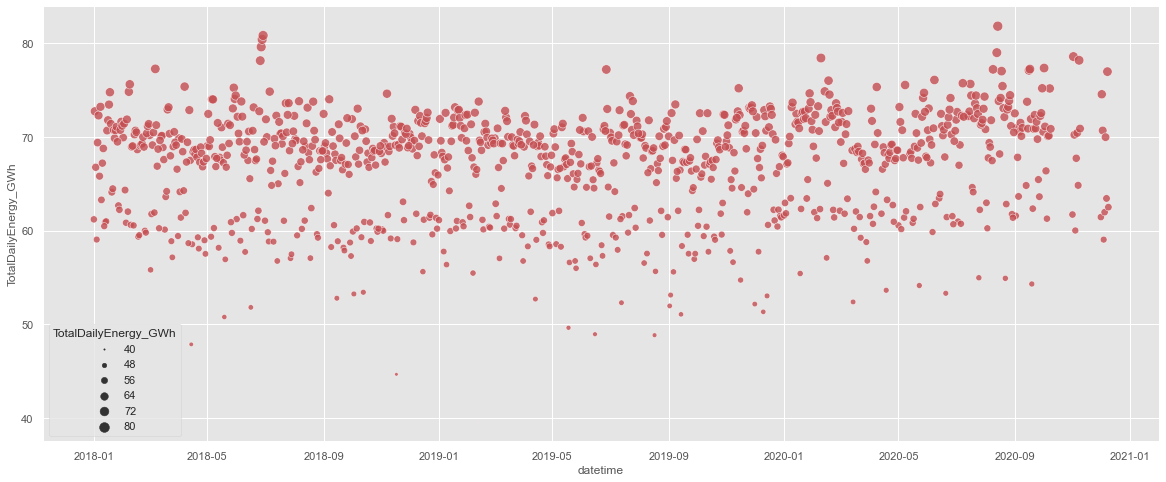

In [109]:
# Total Daily Energy Plot

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 
import numpy as np 
import pandas as pd
import datetime # for reading date timeseries data
plt.style.use("ggplot") # A nicer style to use for plots
plt.rcParams["figure.figsize"] = (20,8) #sets the plots size

# In order to generate our total daily energy over the years we will first combine data using pd.concat function:
CombinedData = pd.concat([Energy2018, Energy2019, Energy2020])

TotalDailyEnergyPlot = sns.scatterplot(x="datetime", y="TotalDailyEnergy_GWh", size="TotalDailyEnergy_GWh", sizes=(1, 100), alpha=.8, data=CombinedData[0:], color='r')
# We then create a scatter plot with x-axis as date and y as Total Daily Energy
# We based the size of the dots based on the amount of energy using the field 1-100, alpha of 0.8 and colour red.

We can see that the daily energy is consistent throughout each year, it also seems to represent the reduction in energy during the weekends. It can be interpreted also that the energy usage appears to be more based on use of hospital equipment than weather impact as the electricity usage does not appear to be seasonal. We can see a growing trend in 2020 which relates to the timing of the Covid Virus. 

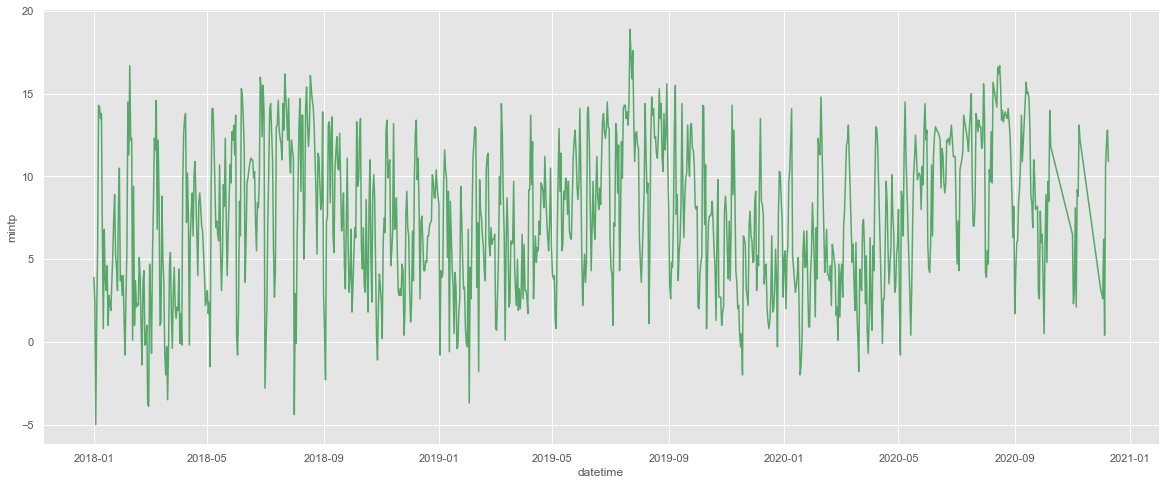

In [110]:
DailyWeatherPlot = sns.lineplot(x="datetime", y="mintp", data=CombinedData[0:], color='g')

Following our statistical analysis of our weather data, our lineplot also verifies that the weather patterns are quite consistent from 2018-2020 with no major abnormals identified. 
Finally lets look at our annual Covid Cases for 2020 for the real life data set:

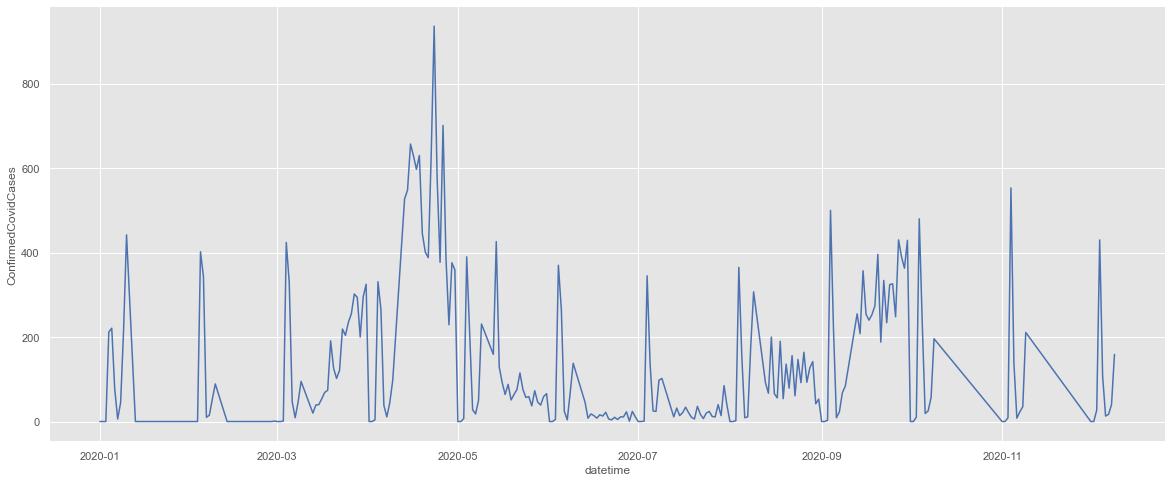

In [111]:
DailyCovidCasesPlot=sns.lineplot(x="datetime", y="ConfirmedCovidCases", data=Energy2020[0:], color='b')

We can see that our cases spiked around April in 2020 and then the cases reduced throughout the summer months before fitting a second wave near end of August 2020. 
Having presented our real life data and briefly summarised key statistics of the datasets, we will know look to create our synthesised datasets based on our real life data.

# 3. Creating our Synthesised Data

Having reviewed our real life data above, in the following sections we will create our synthesised datasets and compare with original.

In [163]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 

np.random.seed(2)

In [164]:
# Creating the Date's for 2018:
start2018 = datetime.datetime(2018, 1, 1)
end2018 = datetime.datetime(2018, 12, 31)
dates2018 = pd.date_range(start2018, end2018, freq='d')

# Creating the Date's for 2019:
start2019 = datetime.datetime(2019, 1, 1)
end2019 = datetime.datetime(2019, 12, 31)
dates2019 = pd.date_range(start2019, end2019, freq='d')

# Creating the Date's for 2020:
start2020 = datetime.datetime(2020, 1, 1)
end2020 = datetime.datetime(2020, 10, 1)
dates2020 = pd.date_range(start2020, end2020, freq='d')

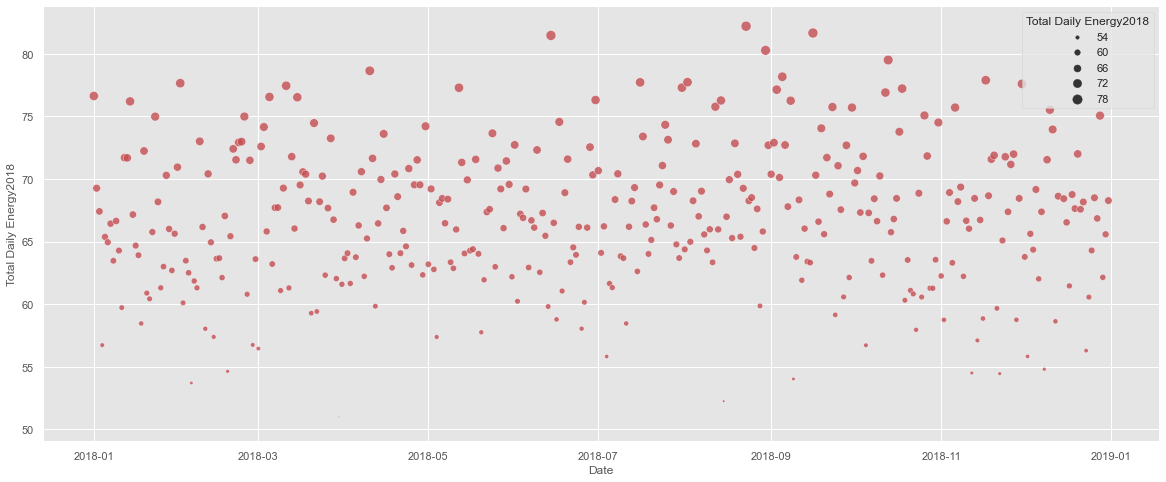

In [165]:
# Creating the Energy for 2018:

np.random.seed(3)

synEne2018 = np.random.normal(loc=66.883795, scale=5.448145, size=365)
#synEne2018 = np.random.poisson(lam=66.883795, size=365)
syn2018EnergyDict = pd.DataFrame({'Date': dates2018, 'Total Daily Energy2018': synEne2018})

SynDailyEnergy2018Plot = sns.scatterplot(x="Date", y="Total Daily Energy2018", size="Total Daily Energy2018", sizes=(1, 100), alpha=.8, data=syn2018EnergyDict[0:], color='r')
plt.show()

In [166]:

Energy2018 = sns.scatterplot(x="datetime", y="TotalDailyEnergy_GWh", size="TotalDailyEnergy_GWh", sizes=(1, 100), alpha=.8, data=Energy2018[0:], color='r')
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

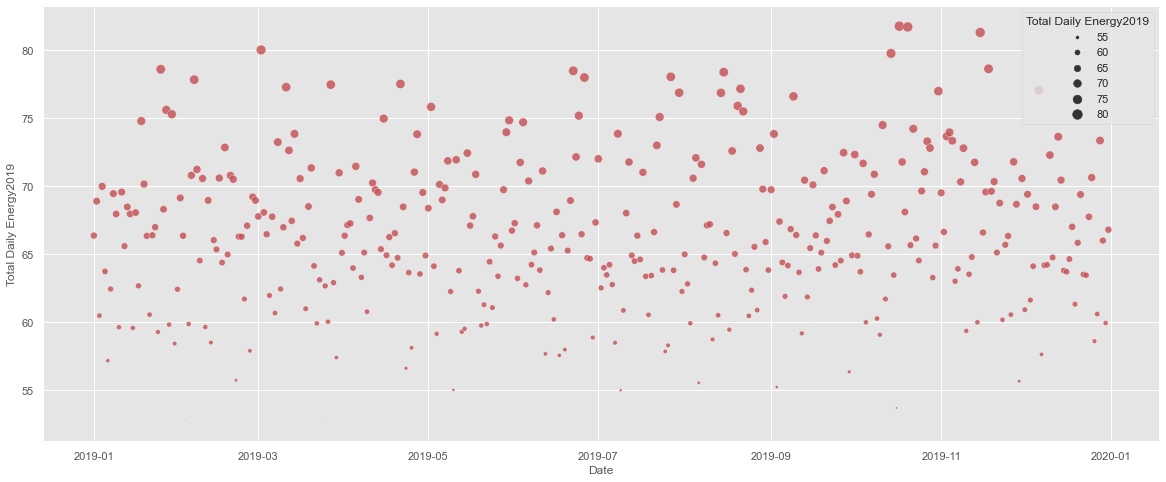

In [141]:
# Creating the Energy for 2019:

np.random.seed(4)

synEne2019 = np.random.normal(loc=66.090044, scale=5.620020, size=365)
syn2019EnergyDict = pd.DataFrame({'Date': dates2019, 'Total Daily Energy2019': synEne2019})

SynDailyEnergy2019Plot = sns.scatterplot(x="Date", y="Total Daily Energy2019", size="Total Daily Energy2019", sizes=(1, 100), alpha=.8, data=syn2019EnergyDict[0:], color='r')
plt.show()

In [169]:
Energy2019 = sns.scatterplot(x="datetime", y="TotalDailyEnergy_GWh", size="TotalDailyEnergy_GWh", sizes=(1, 100), alpha=.8, data=Energy2019[0:], color='r', ax=ax)
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

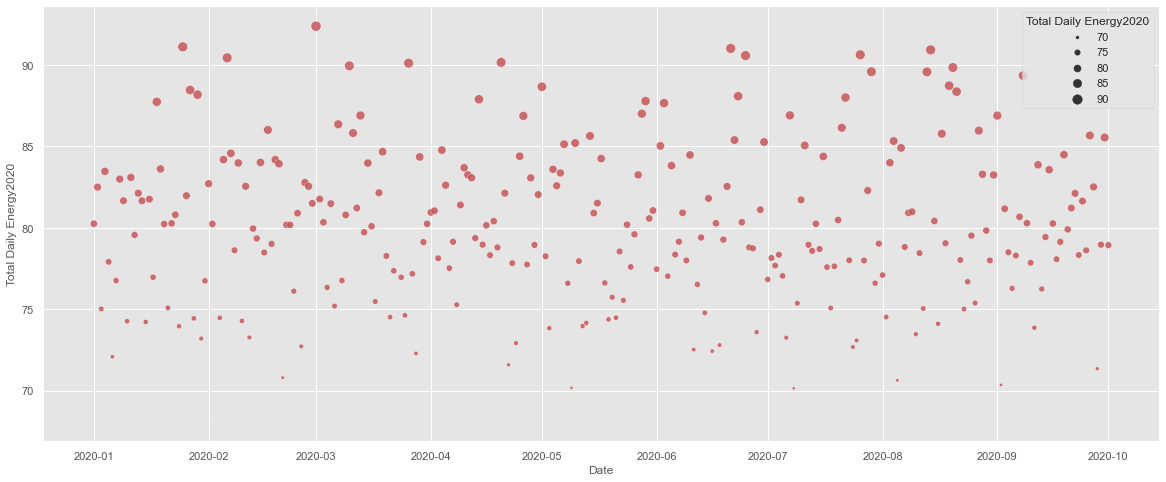

In [160]:
# Creating the Energy for 2020:

np.random.seed(4)

synEne2020 = np.random.normal(loc=80, scale=5, size=275) # CHANGE TO REFLECT 
syn2020EnergyDict = pd.DataFrame({'Date': dates2020, 'Total Daily Energy2020': synEne2020})

SynDailyEnergy2020Plot = sns.scatterplot(x="Date", y="Total Daily Energy2020", size="Total Daily Energy2020", sizes=(1, 100), alpha=.8, data=syn2020EnergyDict[0:], color='r')
plt.show()

          Date  Total Daily Energy     MinTp  DailyCovidCases  \
0   2018-01-01                  65  9.191878              0.0   
1   2018-01-02                  68  8.953930              0.0   
2   2018-01-03                  65  9.488467              0.0   
3   2018-01-04                  59  8.328968              0.0   
4   2018-01-05                  62  8.896540              0.0   
..         ...                 ...       ...              ...   
360 2018-12-27                  72  9.763957              0.0   
361 2018-12-28                  65  9.317253              0.0   
362 2018-12-29                  79  9.734431              0.0   
363 2018-12-30                  57  9.587562              0.0   
364 2018-12-31                  65  9.533918              0.0   

     DailyCovidDeaths  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
..                ...  
360               0.0  
361               0.0  
362

NameError: name 'ax1' is not defined

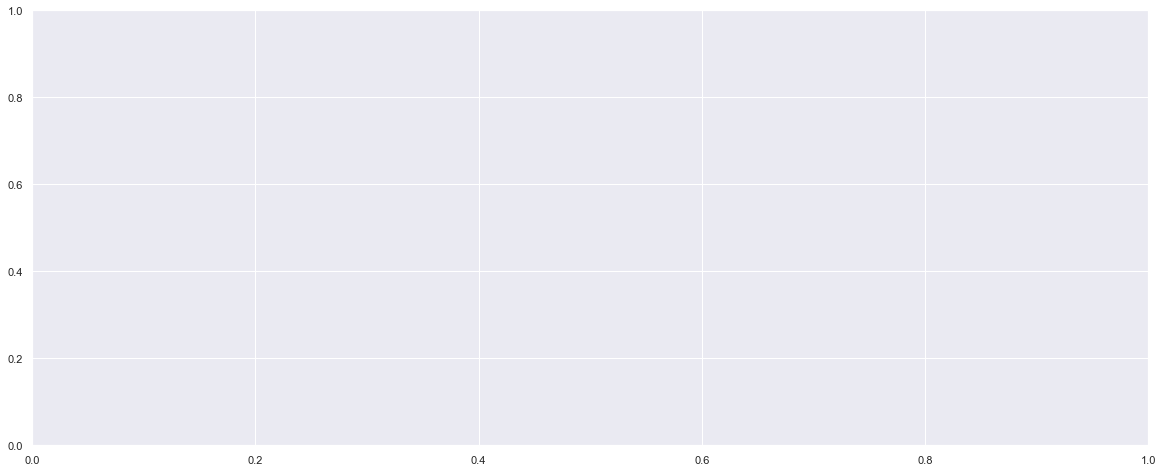

In [50]:
import numpy as np
import pandas as pd
import datetime
import math

np.random.seed(2)

start2018 = datetime.datetime(2018, 1, 1)
end2018 = datetime.datetime(2018, 12, 31)
dates2018 = pd.date_range(start2018, end2018, freq='d')
synEne2018 = np.random.poisson(lam=66.883795, size=365)
synCovidDailyCases2018 = np.random.normal(loc=0.0, scale=0.0, size=365)
synCovidDailyDeaths2018 = np.random.normal(loc=0.0, scale=0.0, size=365)

t_range = 4.690315 # our range
t_mean = 7.203288  # our mean
t_min = -5.0
#synMintp2018 = np.sin(np.arange(365)/365 * math.pi)*t_range + t_min
#synMintp2018 = np.sin(np.arange(365)/365 * math.pi)*t_range + t_mean
synMintp2018 += np.random.normal(loc=7.203288, scale=0.2, size=365)


#synMintp2018 = np.random.poisson(lam= 7.203288, size=365)
#synEne2018 = np.random.normal(loc=66.883795, scale=5.448145, size=365)
#synMintp2018 = np.random.normal(loc=7.203288, scale=4.690315, size=365)
#synCovidDailyCases2018 = np.random.normal(loc=0.0, scale=0.0, size=365)
#synCovidDailyDeaths2018 = np.random.normal(loc=0.0, scale=0.0, size=365)


syn2018data = pd.DataFrame({'Date': dates2018, 'Total Daily Energy': synEne2018, 'MinTp': synMintp2018, 'DailyCovidCases': synCovidDailyCases2018, 'DailyCovidDeaths': synCovidDailyDeaths2018})
print(syn2018data)

fig, ax =plt.subplots()
sns.scatterplot(x="Date", y='MinTp', data=syn2018data[0:], color='r')

In [11]:
start2018 = pd.datetime(2018, 1, 1)
end2018 = pd.datetime(2018, 12, 31)
index2018 = pd.date_range(start2018, end2018, freq='d')
index2018


<ipython-input-11-c6425c15ace2>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start2018 = pd.datetime(2018, 1, 1)
<ipython-input-11-c6425c15ace2>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end2018 = pd.datetime(2018, 12, 31)


DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

**References**

https://docs.python.org/3/library/datetime.html
https://www.met.ie/climate/available-data/historical-data
https://data.gov.ie/dataset/covidstatisticsprofilehpscirelandopendata1/resource/2bf52086-d76c-42b2-91f6-b99ec5952173
